<a href="https://colab.research.google.com/github/pedro-phg/dev-guide/blob/main/Laborat%C3%B3rio_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório 03 

**Nome:** Pedro Henrique Gonçalves Adalberto
**RA:** 11201921359

# Importação das bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Definição das Funções

In [ ]:
def el_dof2(iel, nnel, ndof):
  edof = nnel * ndof
  start = (iel-1) * (nnel-1) * ndof

  index = np.zeros(edof)

  for i in range(edof):
    index[i] = start + i + 1
  
  return index

def matrix_el2(acoef, bcoef, ccoef, elong):
  a1 = -(acoef/elong); a2=bcoef/2; a3=ccoef*elong/6
  k = np.array([[a1-a2+2*a3, -a1+a2+a3], 
                [-a1-a2+a3, a1+a2+2*a3]])
  return k

def vec_el2(x1, xr):
  h = xr - x1;
  f = np.array([h/2, h/2])
  return f

def constraint2(kk, ff, bcdof, bcval):
  n = len(bcdof)
  sdof = kk.shape[0]

  for i in range(n):
    c = int(bcdof[i])
    
    for j in range(sdof):
      kk[c, j] = 0;

    kk[c, c] = 1
    ff[c] = bcval[i]

  return kk, ff

def assemble2(kk, ff, k, f, index):
  edof = len(index)

  for i in range(edof):
    ii = int(index[i])
    ff[ii] = ff[ii] + f[i]

    for j in range(edof):
      jj = int(index[j])
      kk[ii, jj] = kk[ii, jj] + k[i, j]

  return kk, ff

# Definição da função para iterar

Resumidamente necessitamos de uma função que receba o número de elementos e retorne os valores da solução exata e da solução numérica encontrada. Essa função é definida abaixo como *function_to_interate* e recebe dois argumentos: o número de elementos (*numberOfElements*) e uma *booleano* para plotar ou não o gráfico. 

In [ ]:
def function_to_iterate(numberOfElements = 1, plot=False):

  acoef = 1; bcoef = -3; ccoef = 2

  nel = numberOfElements #número de elementos
  nnel = 2 #número de nós por elemento
  ndof = 1 #número de graus de liberdade por nó

  L = 1 #comprimento do domínio da simulação
  gcoord = np.linspace(0, L, nel+1) #coordenadas dos nós
  nnode = len(gcoord) #número de nós
  sdof = nnode *ndof #número de graus de liberdade do sistema

  nodes = np.empty([nel, nel-1])

  for i in range(0, nel):
    nodes[i, 0] = int(i+1)
    nodes[i, 1] = int(i + 2)

  index = np.zeros(nnel*sdof)
  ff = np.zeros(sdof)
  kk = np.zeros([sdof, sdof])

  for iel in range(nel):
    nl = nodes[iel, 0]          # nodes dos elementos
    nr = nodes[iel, 1]

    xl = gcoord[int(nl-1)]               # coord. dos elementos
    xr = gcoord[int(nr-1)]

    h = xr - xl
    index = el_dof2(iel, nnel, ndof)
    k = matrix_el2(acoef, bcoef, ccoef, h)
    f = vec_el2(xl, xr)

    kk, ff = assemble2(kk, ff, k, f, index)
    kkff = matrix = np.column_stack((kk, ff))


  bcdof = np.array([0, nnode-1]); bcval = np.array([0, 0])

  kk, ff = constraint2(kk, ff, bcdof, bcval)

  kkff = matrix = np.column_stack((kk, ff))

  fsol = np.linalg.solve(kk, ff)
  #print(kkff)

  c1 = 0.5/np.exp(L)
  c2 = -0.5*(1+1/np.exp(L))

  esol = np.zeros(nnode)

  for i in range(nnode):
    x = gcoord[i]
    esol[i] = c1*np.exp(2*x)+c2*np.exp(x) + 1/2;

  num = np.arange(1, nel + 2, 1)

  #resultados = np.column_stack((num.T, fsol, esol.T))

  X = np.linspace(0,L,100);
  Y = c1*np.exp(2*X)+c2*np.exp(X) + 1/2;

  if plot:
    plt.plot(X, Y, label='Solução Exata')
    plt.plot(gcoord, fsol, label = 'MEF')
    #plt.fill(gcoord, fsol, alpha=0.2, where = y<=0)
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title("Método dos Elementos Finitos")
    plt.legend()

  return fsol, esol

# Teste da Função

Altere o valor do argumento *numberOfElements* e verifique o comportamento do gráfico

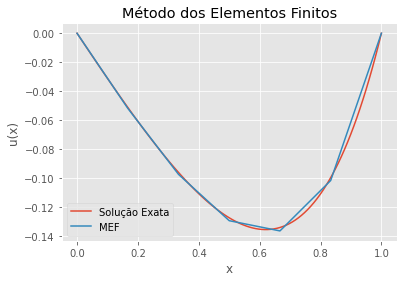

In [ ]:
solution, exact_solution = function_to_iterate(numberOfElements = 6, plot = True)

# Definindo um critério para definir o número de elementos

Seja **r** o vetor "resto" que contém o módulo da diferença entre o valor exato da solução e o valor numérico em cada ponto do domínio discretizado, pode-se estipular a quantidade de elementos ao determinamos uma *tolerância máxima* que desejamos que nossos resultados tenham. Em que:

$$ \vec{r}=\left|x-x_c\right| $$

e

$$tol\ =\ max(r)$$


# Definindo a função para retornar o número máximo de elementos

In [ ]:
def minimalQuantityOfElements(tol = 10e-5):
  error = 1
  nelements = 3
  while(error > tol):
    solution, exact_solution = function_to_iterate(nelements)
    error = np.max(np.abs(solution-exact_solution))
    nelements += 1

  print("Número de Elementos:", nelements-1)
  return nelements - 1

# Testes

In [ ]:
minimalQuantityOfElements(tol = 10e-5)
minimalQuantityOfElements(tol = 10e-6)
minimalQuantityOfElements(tol = 10e-7)

Número de Elementos: 29
Número de Elementos: 92
Número de Elementos: 289


289